# Final Capstone Project : Vacationing in Cape Town, an analysis of activities and accommodation rental prices  

## Introduction: Problem and Background discussion

Living in South Africa, one of the most visited Tourist spots is the wider Capetown area, as a potential visitor to this area one is inundated with a huge amount of options on what to do and where to stay so much so that it can be overwhelming  on how to make the most advantages decision to get the most out of ones vacation to this beautiful area. In approaching this problem there are two questions that I want to focus on:   
•	What are my options on things that I can do?   
•	Where should I stay in relation to the activities that I want to perform and what is a reasonable price that I can spend on accommodation. 


## Data acquisition and cleaning

### Data sources

From my understanding there is no available data that provides a list of Boroughs with their respective Neighbourhoods and coordinates, to get over this hurdle I scrapped <a href="https://www.privateproperty.co.za/for-sale/western-cape/4">property website </a> to obtain a list of Neighbourhoods that reside within this area, due to it being set up to cater for property sales as well as for the whole of the Western Cape area, I revised the scope in two ways:   
•	All neighbourhoods that resided within the larger Cape Town area were included under Cape Town.   
•	The list was revised where a person would be able to take a day trip to the specific area all other areas were removed from the list due to their proximity being too far from Cape Town. 


#### Importing required Modules

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Scraping Property 24 website to get a list of all the different areas in the western Cape

In [2]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

In [3]:
url = 'https://www.privateproperty.co.za/for-sale/western-cape/4' 
response = requests.get(url)

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')
str_areas = soup.find(id='areas')
lst_areas_elem = str_areas.findAll('li')
lst_areas = []
for i in range(0,len(lst_areas_elem)):
    temp_tag = lst_areas_elem[i]
    lst_areas.append(temp_tag.find('a').text.strip())

#### The below depicts a list of areas that have been retrieved from the property website

In [18]:
lst_Rev_Area = lst_areas

In [19]:
lst_Rev_Area

['Agulhas to Struisbaai',
 'Albertinia',
 'Atlantic Seaboard',
 'Atlantis',
 'Beaufort West',
 'Bellville',
 'Bettys Bay and surrounds',
 'Brackenfell',
 'Buh-Rein',
 'Calitzdorp',
 'Cape Flats',
 'Cape Town City Bowl',
 'Ceres',
 'Clanwilliam and Cederberg',
 'De Rust',
 'Durbanville',
 'Gansbaai',
 'George',
 'Goodwood',
 'Gordons Bay',
 'Grabouw to Swellendam',
 'Great Brak River to Glentana',
 'Heidelberg',
 'Hermanus',
 'Hopefield',
 'Hout Bay',
 'Jacobs Bay',
 'Jongensfontein',
 'Klein Brak And Tergniet',
 'Kleinmond',
 'Knysna',
 'Kraaifontein',
 'Kuilsriver',
 'Ladismith',
 'Laingsburg',
 'Langebaan',
 'Malmesbury',
 'Matroosfontein',
 'Melkbosstrand',
 'Milnerton',
 'Mossel Bay',
 'Oudtshoorn',
 'Paarl to Franschhoek',
 'Parow',
 'Paternoster',
 'Peninsula (False Bay)',
 'Plettenberg Bay',
 'Prince Albert',
 'Riebeek Valley',
 'Riversdale',
 'Robertson to Barrydale',
 'Saldanha',
 'Sedgefield',
 'Somerset West',
 'Southern Suburbs',
 'St Helena Bay',
 'Stellenbosch',
 'Stilbaa

Now that a list of Neighborhoods has been obtained, the co oridnates need to be obtained for each and stored in a pandas Dataframe, to perform this function I am utilising the python Geopy Module

In [20]:
# Creating an empty DataFrame to store the Neighborhoods and their respective co ordinates
import pandas as pd
neighborhoods = pd.DataFrame(columns=['Areas','Latitude', 'Longitude'])

In [23]:
# Runs through the list of neighborhoods and obtains the co ordinates using Geopy

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

for i in range(0,len(lst_Rev_Area)):
    address = lst_Rev_Area[i]+', Western Cape'
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        neighborhoods = neighborhoods.append({'Areas': lst_Rev_Area[i],
                                                  'Latitude': latitude,
                                                  'Longitude': longitude}, ignore_index=True)
    except:
        latitude = 'Not Found'
        longitude = 'Not Found'
        neighborhoods = neighborhoods.append({'Areas': lst_Rev_Area[i],
                                                  'Latitude': latitude,
                                                  'Longitude': longitude}, ignore_index=True)

#print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

In [30]:
neighborhoods.head()

Areas   Latitude  Longitude
0         Albertinia -34.205168  21.587553
1  Atlantic Seaboard -33.909877  18.408503
2           Atlantis -33.567222  18.500278
3      Beaufort West -32.353611  22.580556
4          Bellville -33.883733  18.636870

# Check Point 

Due to possible inconsistencies in the above reads I have saved the results to a csv, to avoid possible data mismatches later on

In [ ]:
neighborhoods.to_csv('Neighborhood_Locations_final.csv')

In [2]:
neighborhoods = pd.read_csv('Neighborhood_Locations_final.csv')
#neighborhoods_final = neighborhoods_final[['Areas','Latitude','Longitude']]

As above the neighborhoods list was revised taking the following two crietria in to account:  

<li>All neighbourhoods that resided within the larger Cape Town area were included under Cape Town.</li>
<li>Where a person would be able to take a day trip to the specific area all other areas were removed from the list due to their proximity being too far from Cape Town.</li>

In [3]:
neighborhoods_revised_final = pd.read_csv('Neighborhood_Locations_revised_final.csv')
neighborhoods_revised_final.rename(columns={'Areas':'Neighborhood'},inplace = True)

In [98]:
neighborhoods_revised_final#[['Neighborhood','Latitude','Longitude']]

Grouping    Neighborhood   Latitude  Longitude
0              Ceres           Ceres -33.368333  19.309167
1         Overstrand        Gansbaai -34.582778  19.352222
2         Overstrand       Kleinmond -34.338889  19.025278
3        Saldana Bay       Langebaan -33.090717  18.034889
4          Swartland      Malmesbury -33.460278  18.723611
5        Saldana Bay     Paternoster -32.809038  17.891695
6          Swartland  Riebeek-Valley -33.351008  18.870026
7        Saldana Bay        Saldanha -32.997778  17.945556
8       Stellenbosch    Stellenbosch -33.934444  18.869167
9             Strand          Strand -33.546977  20.727530
10       Saldana Bay      Vredenburg -32.906738  17.990037
11    Drakensfontein      Wellington -33.643055  19.010556
12       Breedvalley       Worcester -33.646238  19.445927
13        Overstrand      Bettys-Bay -34.353611  18.917778
14   Theewaterskloof         Grabouw -34.153056  19.013889
15    Drakensfontein           Paarl -33.741667  18.975000
16         Langeberg       Robertson -33.802222  19.883611
17        Bergrivier        Velddrif -32.785556  18.180556
18         Swartland     Yzerfontein -33.346104  18.160208
19      Stellenbosch     Franschhoek -33.909167  19.119444
20  City_of_Capetown   Somerset-West -34.082113  18.849288
21  City_of_Capetown       Cape-Town -33.961469  18.399721

#### Creating a map of the Western Cape with neighborhoods superimposed on top.

In [5]:
# create map of the Western Cape using latitude and longitude values
latitude = -33.9131227
longitude = 18.0942496
map_westerncape = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods_revised_final['Latitude'], neighborhoods_revised_final['Longitude'],
                                           neighborhoods_revised_final['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_westerncape)  
    
map_westerncape

## 2. Explore Regions in the Western Cape 

As mentioned above I have approached this with two respective data sets that I want to focus on, which are the availability of accomodation in these areas and their related cost and places of interest that comes from Four square, the below deals with obtaining the necessary Data, in the following sequence:    
<ol>
<li>Accomodation data</li>
<li>Four Square data</li>
</ol>

### Obtaining Accomdation details

In answering the second part of my question I needed to obtain accomodation information, to obtain this information I scraped the utilised the above list of neighborhoods and scraped the Air Bnb website for each of the neighborhoods

In [60]:
# Setting up beautiful Soup
soup = BeautifulSoup(response.text, 'html.parser')
str_areas = soup.find_all('div', {'class': ['_8ssblpx']})

In [62]:
# Obtaining the list of Urls for each of the respective neighborhoods
lst_neighborhoods = list(neighborhoods_revised_final.Neighborhood)
new_list=[]
for i in lst_neighborhoods:
    new_list.append('-'.join(i.split(' ')))
neighborhoods_revised_final.Neighborhood = new_list

lst_neighborhoods = list(neighborhoods_revised_final.Neighborhood)


# getting the Urls for each of the areas
lst_url=[]
x=0
for i in lst_neighborhoods:
    lst_url.append('https://www.airbnb.co.za/s/'+ i +'/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&search_type=search_query&source=structured_search_input_header&adults=1')
    x+=1

In [77]:
# creating an empty dataframe that will hold the information for each of the items that have been scraped
df_places_stay_2 = pd.DataFrame(columns=['Neighborhood','Venue','Price'])

In [78]:
# scraping all of the websites to populate all the accomodation information
for j in range(0,len(lst_url)):   
    response_2 = requests.get(lst_url[j])
    soup = BeautifulSoup(response_2.text, 'html.parser')
    str_areas = soup.find_all('div', {'class': ['_8ssblpx']})

    for i in range(0,len(str_areas)):
        a = str(str_areas[i].find('a')).find('=')
        b = str(str_areas[i].find('a')).find('class')
        temp_venue = (str(str_areas[i].find('a'))[a+2:b-2])
        temp_price = str_areas[i].find_all('span',{'class':'_1p7iugi'})[0].text.strip()
        temp_rating = str_areas[i].find_all('span',{'class':'_krjbj'})[0].text.strip()
        #temp_unit = str_areas[i].find_all('div',{'class':'_1e45hr5'})[0].text.strip()
        df_places_stay_2 = df_places_stay_2.append({'Neighborhood':lst_neighborhoods[j],
                                                'Venue':temp_venue,
                                                'Price':temp_price,},ignore_index=True)

df_places_stay_2

Neighborhood                                              Venue  \
0             Ceres            Mosterts Hoek Self Catering Guest House   
1             Ceres         Ceres Cozy Cottage with private courtyard.   
2             Ceres              Mountain Spring Cottage close to town   
3             Ceres                                        Cozy Corner   
4             Ceres                                       Koraalboom 1   
5             Ceres  A self-catered, budget-friendly apartment in C...   
6             Ceres                            La Bruyere Farm Cottage   
7             Ceres   Trendy private container home! Riverstone House.   
8             Ceres   Worcester the Karoo  Guestroom-OPEN-Covid19 Reg.   
9             Ceres                      Damhuis Self-catering Cottage   
10            Ceres                                       Duim se Huis   
11            Ceres       Under Oak Cottages: Josephine Studio Cottage   
12            Ceres                The Moongazing Cabin @ 9 Mount Bain   
13            Ceres                                 Mostertshoek Place   
14            Ceres   Steenbok Farm Cottage-private wood fired hot tub   
15            Ceres                           Lavender and Herb Garden   
16            Ceres   Malbec -cosy country cottage surrounded by vines   
17            Ceres            Dennecres4, safe and secure family room   
18            Ceres                                       Orchard Stay   
19            Ceres               Spacious Elandsrivier farm apartment   
20         Gansbaai        Gansbaai seafront holiday house: Ons C-Huis   
21         Gansbaai                                    Whale of a Time   
22         Gansbaai      Tourist Lodge Gansbaai - Standard Double Room   
23         Gansbaai                    Oom Piet Accommodation - Unit 4   
24         Gansbaai                                           SEA SONG   
25         Gansbaai  Neat &amp; Spacious apartment with Views in De...   
26         Gansbaai                                       Harbour view   
27         Gansbaai                                       @lantic View   
28         Gansbaai    Gansbaai Home with a sea view - De Walvis Villa   
29         Gansbaai                                Drome (Eng. Dreams)   
30         Gansbaai                         Cosy and cute farm cottage   
31         Gansbaai    Gansbaai Central: Cozy self-catering apartment!   
32         Gansbaai  Eco Adrenalin Adventure Lodge 1 Ocean Front Queen   
33         Gansbaai                                        Piknwyntjie   
34         Gansbaai                            The Little Wooden Cabin   
35         Gansbaai         Tourist Lodge Gansbaai - Double/Twin Rooms   
36         Gansbaai                    Oom Piet Accommodation - Unit 3   
37         Gansbaai                      Retro Chic with Mountain View   
38         Gansbaai                            The Traveller’s Cottage   
39         Gansbaai  ROOIETJIES - One of the earliest fisherman houses   
40        Kleinmond                                     Harbour View 2   
41        Kleinmond                            Karinchen Self-Catering   
42        Kleinmond                                  Our special house   
43        Kleinmond  Bungalow by the sea -Kleinmond, close to Cape ...   
44        Kleinmond                Honeyrock Cottages 1a Mountain Rose   
45        Kleinmond  Family Home close to sea, mountains and ammeni...   
46        Kleinmond                                     Alpaca Cottage   
47        Kleinmond                        The Conservancy Betty's Bay   
48        Kleinmond     Sea Studio Wifi plus Netflix,Showmax and DSTV.   
49        Kleinmond                               Holiday@Number Eight   
50        Kleinmond                            Mond Kleine Guest Villa   
51        Kleinmond        Kleinmond Sea Front self catering apartment   
52        Kleinmond                               Fynbos Mountain View   
53        K

In [6]:
# Creating a checkpoing of information obtained
df_places_stay_2.to_csv('df_places_tostay.csv',index=False)
df_places_stay_2 = pd.read_csv('df_places_tostay.csv')

In [7]:
# Cleaning up the the price field so that i can be utilised
df_places_stay_2.Price = df_places_stay_2.Price.str.replace(':',' ').str.split(' ',expand =True)[1].str.replace('R','')
df_places_stay_2.Price = df_places_stay_2.Price.str.replace(',','')
df_places_stay_2.Price = df_places_stay_2.Price.str.replace('\xa0','')
df_places_stay_2.Price = df_places_stay_2.Price.astype(int)

### Obtaining the necessary infromation to be able to produce a Chloropleth view

Due to there being no geoJson file that provided me with the necessary districts to be able to produce a clorpleth view of the average nightly pricing across all of the regeons, I had to construct one: steps were as follows:   
1) searching for the Neighborhood using the following URL :https://mapit.code4sa.org/area/53982.html this provided a veiw of all of the neighborhoods, some of the areas needed to be adjusted as the areas were too small to have any value, thus some of the Neighborhoods had to be grouped  
2) Once all locations had been obtained for each of the Neighborhoods and Groupings assgined I combined all the Geojson files together to using URL: http://geojson.io/, I also utilised this create the name for each of the groupings

In [8]:
# Inorder to produce a Chloropleth Map of the regeon to understand which area has higher prices the neigbourhoods need to be 
# further grouped. How groupings where arrived at can be seen above. 

# creating a dictionary to map to the respective groupings
dict_group_map = pd.read_csv('Neighborhood_Locations_revised_final.csv').set_index('Areas').to_dict()['Grouping']
df_places_stay_2['Grouping'] = df_places_stay_2.Neighborhood.map(dict_group_map)
df_places_stay_2.head()

Neighborhood                                       Venue  Price Grouping
0        Ceres     Mosterts Hoek Self Catering Guest House    900    Ceres
1        Ceres  Ceres Cozy Cottage with private courtyard.    580    Ceres
2        Ceres       Mountain Spring Cottage close to town    900    Ceres
3        Ceres                                 Cozy Corner    350    Ceres
4        Ceres                                Koraalboom 1    300    Ceres

In [99]:
df_places_stay_2.shape

(440, 4)

In [9]:
# Finding the average price per neighborhood
df_avg_pricing = df_places_stay_2.groupby('Grouping').Price.mean().to_frame().reset_index()
df_avg_pricing

Grouping       Price
0         Bergrivier  863.200000
1        Breedvalley  951.750000
2              Ceres  896.950000
3   City_of_Capetown  565.725000
4     Drakensfontein  721.625000
5          Langeberg  818.850000
6         Overstrand  855.566667
7        Saldana Bay  673.325000
8       Stellenbosch  757.225000
9             Strand  868.550000
10         Swartland  974.150000
11   Theewaterskloof  653.800000

Overlaying the average pricing per the Grouping on to the map of the Western Cape to produce a chloropleth map of the regeon to understand how average nightly price per area

In [10]:
# Selecting the GeoJson file
import PySimpleGUI as sg
path_geo=sg.PopupGetFile('Get File')

In [68]:
# Coming up with the Chloropleth view 
map_westerncape = folium.Map(location=[latitude, longitude], zoom_start=8)
map_westerncape.choropleth(
    geo_data=path_geo,
    data=df_avg_pricing,
    columns=['Grouping', 'Price'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Nightly Rate'
)
map_westerncape

The Above view may be a bit distored, as their may be some cheaper places to stay in the more expensive regeons, to develop an understanding of this I further broke down the data into the following categories:  
1) bucketed the price per night  
2) viewed the above bucketing on a histogram to see how the nightly prices were distributed  

The goal here is to see if there some coherency between the average price per regeon to the frequency of the respective buckets

In [102]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [103]:
count,bin_edges = np.histogram(df_places_stay_2['Price'])
df_places_stay_2['Price'].plot(kind='hist',figsize=(8,5),xticks = bin_edges,color='steelblue')
plt.title('Histogram of the Distribution of the per night pricing')
plt.ylabel('Number of available places to stay')
plt.xlabel('Price per night')

plt.show()

In [182]:
# sorting the values in the data frame based on the groupings
df_places_stay_2.sort_values(by='Grouping',inplace=True)

The above histogram does provide an interesting view of how the pricing is clustered accross each of the regeons, however I felt i require a better view of the data and how it was distributed across the sample. To achieve this I plotted the data on a Swarmplot

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Swarmplot
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
sns.swarmplot(data=df_places_stay_2,x='Grouping',y='Price',dodge=True)

plt.title('Swarmplot depicting the per night pricing distribution')
plt.ylabel('Price per night')
plt.xlabel('Neighbourhood Groupings')

plt.show()

In [143]:
df_places_stay_2.describe()

Price
count   440.000000
mean    787.486364
std     539.730414
min     144.000000
25%     447.000000
50%     646.000000
75%     961.500000
max    5500.000000

As can be seen above the Chloropleth view does not provide an accurate view of the price distribution accross each fo the areas, as can be seen from the above graph most pricing resides within the R500-R1000 band

To obtain a better understanding of the pricing for each of the groupings, view of the above Swarmplot will need to be produced for each of the groupings

#### Producing a view for Bergrivier Grouping

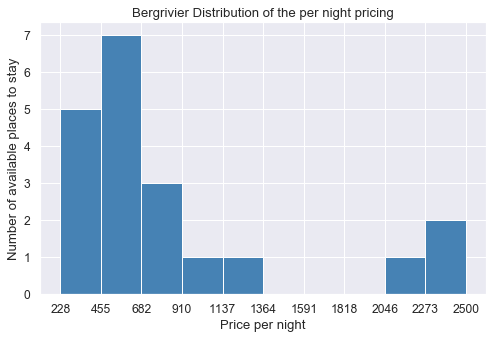

In [188]:
area = 'Bergrivier'
count,bin_edges = np.histogram(df_places_stay_2.loc[df_places_stay_2.Grouping== area]['Price'])
df_places_stay_2.loc[df_places_stay_2.Grouping==area]['Price'].plot(kind='hist',figsize=(8,5),xticks = bin_edges,color='steelblue')
plt.title(area+' Distribution of the per night pricing')
plt.ylabel('Number of available places to stay')
plt.xlabel('Price per night')

plt.show()

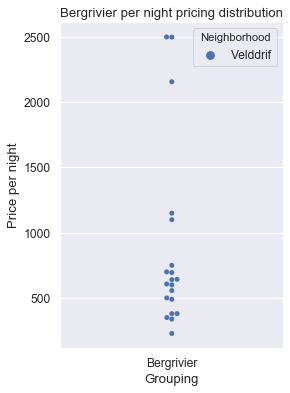

In [186]:
#Swarmplot
area = 'Bergrivier'
plt.figure(figsize=(4,6))
sns.set(font_scale=1.1)
sns.swarmplot(data=df_places_stay_2.loc[df_places_stay_2.Grouping==area],x='Grouping',y='Price',hue='Neighborhood',dodge=True)

plt.title(area+' per night pricing distribution')
#plt.title('Histogram of the Distribution of the per night pricing')
plt.ylabel('Price per night')

plt.show()

In [120]:
df_places_stay_2.loc[df_places_stay_2.Grouping== area].describe()

Price
count    20.000000
mean    863.200000
std     697.467796
min     228.000000
25%     462.500000
50%     623.500000
75%     837.500000
max    2500.000000

#### Producing a view for Breedvalley Grouping

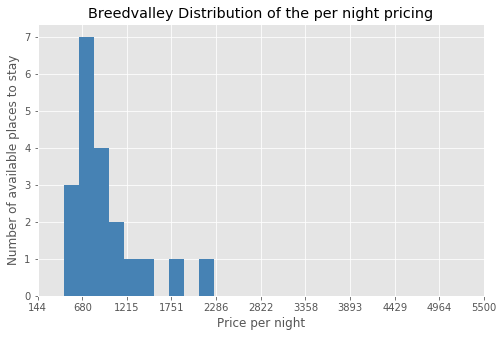

In [121]:
area = 'Breedvalley'
#count,bin_edges = np.histogram(df_places_stay_2.loc[df_places_stay_2.Grouping== area]['Price'])
df_places_stay_2.loc[df_places_stay_2.Grouping==area]['Price'].plot(kind='hist',figsize=(8,5),xticks = bin_edges,color='steelblue')
plt.title(area+' Distribution of the per night pricing')
plt.ylabel('Number of available places to stay')
plt.xlabel('Price per night')

plt.show()

In [187]:
#Swarmplot
area = 'Breedvalley'
plt.figure(figsize=(4,6))
sns.set(font_scale=1.1)
sns.swarmplot(data=df_places_stay_2.loc[df_places_stay_2.Grouping==area],x='Grouping',y='Price',hue='Neighborhood',dodge=True)

plt.title(area+' per night pricing distribution')
#plt.title('Histogram of the Distribution of the per night pricing')
plt.ylabel('Price per night')

plt.show()

In [122]:
df_places_stay_2.loc[df_places_stay_2.Grouping== area].describe()

Price
count    20.000000
mean    951.750000
std     440.224808
min     461.000000
25%     646.000000
50%     858.000000
75%    1077.000000
max    2261.000000

#### Producing a view for Ceres Grouping

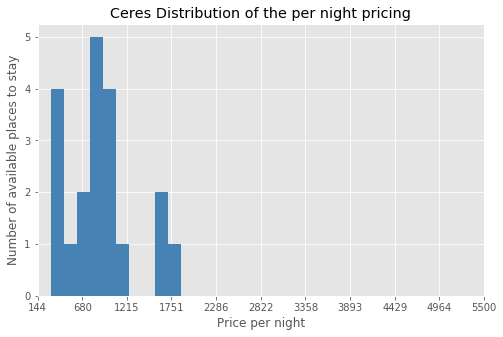

In [123]:
area = 'Ceres'
#count,bin_edges = np.histogram(df_places_stay_2.loc[df_places_stay_2.Grouping== area]['Price'])
df_places_stay_2.loc[df_places_stay_2.Grouping==area]['Price'].plot(kind='hist',figsize=(8,5),xticks = bin_edges,color='steelblue')
plt.title(area+' Distribution of the per night pricing')
plt.ylabel('Number of available places to stay')
plt.xlabel('Price per night')

plt.show()

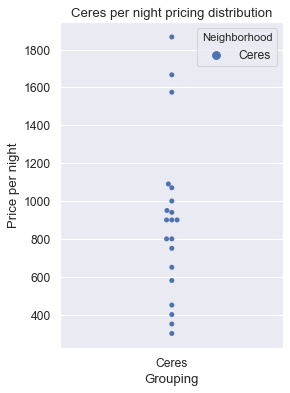

In [189]:
#Swarmplot
area = 'Ceres'
plt.figure(figsize=(4,6))
sns.set(font_scale=1.1)
sns.swarmplot(data=df_places_stay_2.loc[df_places_stay_2.Grouping==area],x='Grouping',y='Price',hue='Neighborhood',dodge=True)

plt.title(area+' per night pricing distribution')
#plt.title('Histogram of the Distribution of the per night pricing')
plt.ylabel('Price per night')

plt.show()

In [124]:
df_places_stay_2.loc[df_places_stay_2.Grouping== area].describe()

Price
count    20.00000
mean    896.95000
std     421.79547
min     300.00000
25%     632.50000
50%     900.00000
75%    1017.50000
max    1867.00000

#### Producing a view for City_of_Capetown Grouping

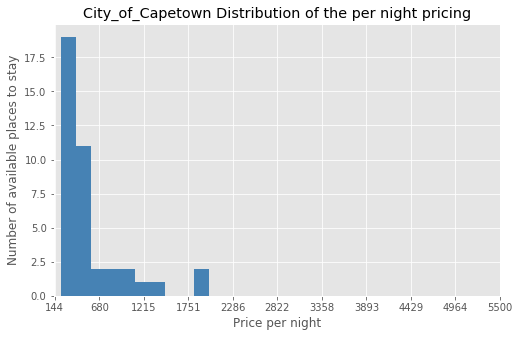

In [125]:
area = 'City_of_Capetown'
#count,bin_edges = np.histogram(df_places_stay_2.loc[df_places_stay_2.Grouping== area]['Price'])
df_places_stay_2.loc[df_places_stay_2.Grouping==area]['Price'].plot(kind='hist',figsize=(8,5),xticks = bin_edges,color='steelblue')
plt.title(area+' Distribution of the per night pricing')
plt.ylabel('Number of available places to stay')
plt.xlabel('Price per night')

plt.show()

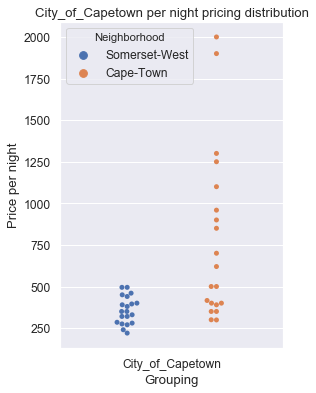

In [190]:
#Swarmplot
area = 'City_of_Capetown'
plt.figure(figsize=(4,6))
sns.set(font_scale=1.1)
sns.swarmplot(data=df_places_stay_2.loc[df_places_stay_2.Grouping==area],x='Grouping',y='Price',hue='Neighborhood',dodge=True)

plt.title(area+' per night pricing distribution')
#plt.title('Histogram of the Distribution of the per night pricing')
plt.ylabel('Price per night')

plt.show()

In [126]:
df_places_stay_2.loc[df_places_stay_2.Grouping== area].describe()

Price
count    40.000000
mean    565.725000
std     419.094628
min     220.000000
25%     327.500000
50%     400.000000
75%     530.000000
max    2000.000000

#### Producing a view for Drakensfontein Grouping

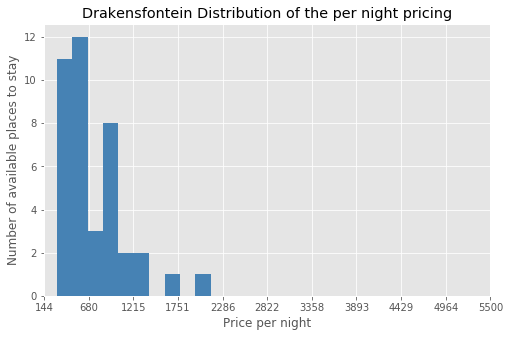

In [127]:
area = 'Drakensfontein'
#count,bin_edges = np.histogram(df_places_stay_2.loc[df_places_stay_2.Grouping== area]['Price'])
df_places_stay_2.loc[df_places_stay_2.Grouping==area]['Price'].plot(kind='hist',figsize=(8,5),xticks = bin_edges,color='steelblue')
plt.title(area+' Distribution of the per night pricing')
plt.ylabel('Number of available places to stay')
plt.xlabel('Price per night')

plt.show()

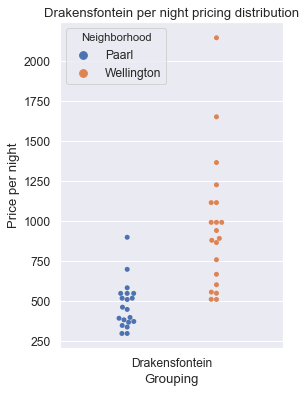

In [191]:
#Swarmplot
area = 'Drakensfontein'
plt.figure(figsize=(4,6))
sns.set(font_scale=1.1)
sns.swarmplot(data=df_places_stay_2.loc[df_places_stay_2.Grouping==area],x='Grouping',y='Price',hue='Neighborhood',dodge=True)

plt.title(area+' per night pricing distribution')
#plt.title('Histogram of the Distribution of the per night pricing')
plt.ylabel('Price per night')

plt.show()

In [128]:
df_places_stay_2.loc[df_places_stay_2.Grouping== area].describe()

Price
count    40.000000
mean    721.625000
std     391.795125
min     300.000000
25%     460.500000
50%     554.500000
75%     910.500000
max    2144.000000

#### Producing a view for Langeberg Grouping

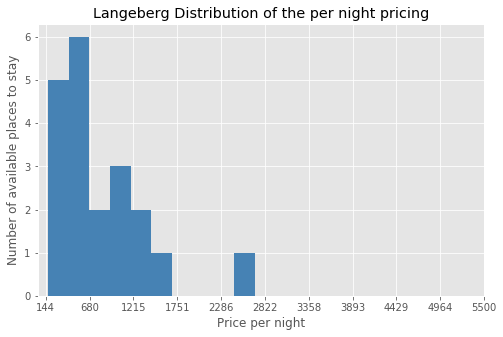

In [129]:
area = 'Langeberg'
#count,bin_edges = np.histogram(df_places_stay_2.loc[df_places_stay_2.Grouping== area]['Price'])
df_places_stay_2.loc[df_places_stay_2.Grouping==area]['Price'].plot(kind='hist',figsize=(8,5),xticks = bin_edges,color='steelblue')
plt.title(area+' Distribution of the per night pricing')
plt.ylabel('Number of available places to stay')
plt.xlabel('Price per night')

plt.show()

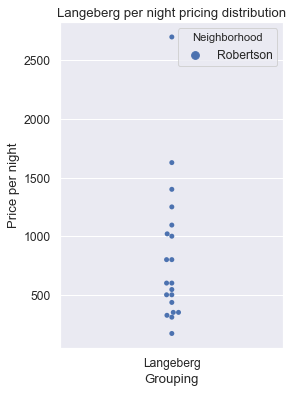

In [192]:
#Swarmplot
area = 'Langeberg'
plt.figure(figsize=(4,6))
sns.set(font_scale=1.1)
sns.swarmplot(data=df_places_stay_2.loc[df_places_stay_2.Grouping==area],x='Grouping',y='Price',hue='Neighborhood',dodge=True)

plt.title(area+' per night pricing distribution')
#plt.title('Histogram of the Distribution of the per night pricing')
plt.ylabel('Price per night')

plt.show()

In [130]:
df_places_stay_2.loc[df_places_stay_2.Grouping== area].describe()

Price
count    20.000000
mean    818.850000
std     596.183412
min     170.000000
25%     413.750000
50%     600.000000
75%    1038.750000
max    2700.000000

#### Producing a view for Overstrand Grouping

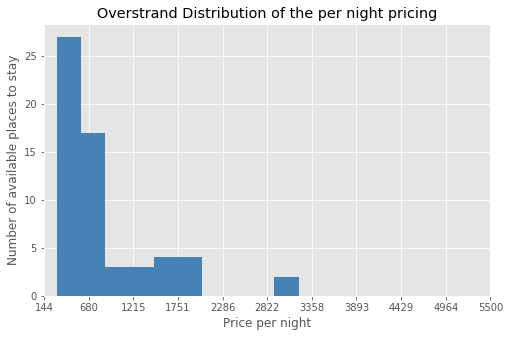

In [131]:
area = 'Overstrand'
#count,bin_edges = np.histogram(df_places_stay_2.loc[df_places_stay_2.Grouping== area]['Price'])
df_places_stay_2.loc[df_places_stay_2.Grouping==area]['Price'].plot(kind='hist',figsize=(8,5),xticks = bin_edges,color='steelblue')
plt.title(area+' Distribution of the per night pricing')
plt.ylabel('Number of available places to stay')
plt.xlabel('Price per night')

plt.show()

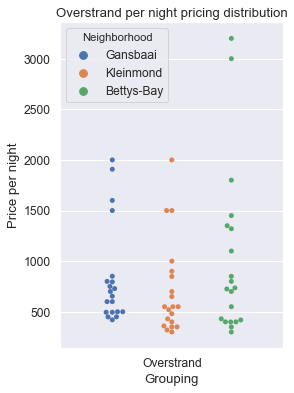

In [193]:
#Swarmplot
area = 'Overstrand'
plt.figure(figsize=(4,6))
sns.set(font_scale=1.1)
sns.swarmplot(data=df_places_stay_2.loc[df_places_stay_2.Grouping==area],x='Grouping',y='Price',hue='Neighborhood',dodge=True)

plt.title(area+' per night pricing distribution')
#plt.title('Histogram of the Distribution of the per night pricing')
plt.ylabel('Price per night')

plt.show()

In [132]:
df_places_stay_2.loc[df_places_stay_2.Grouping== area].describe()

Price
count    60.000000
mean    855.566667
std     620.615096
min     300.000000
25%     444.250000
50%     652.000000
75%     925.000000
max    3200.000000

#### Producing a view for Saldana Bay Grouping

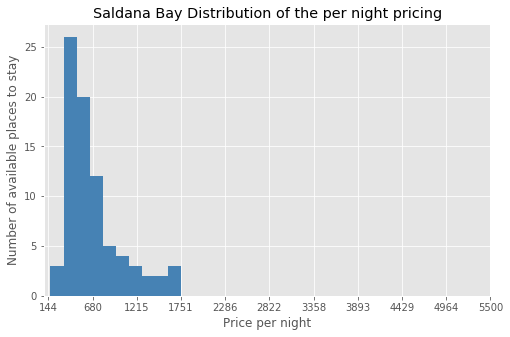

In [133]:
area = 'Saldana Bay'
#count,bin_edges = np.histogram(df_places_stay_2.loc[df_places_stay_2.Grouping== area]['Price'])
df_places_stay_2.loc[df_places_stay_2.Grouping==area]['Price'].plot(kind='hist',figsize=(8,5),xticks = bin_edges,color='steelblue')
plt.title(area+' Distribution of the per night pricing')
plt.ylabel('Number of available places to stay')
plt.xlabel('Price per night')

plt.show()

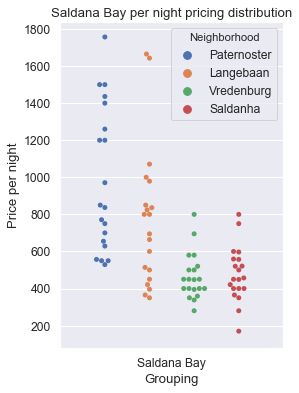

In [194]:
#Swarmplot
area = 'Saldana Bay'
plt.figure(figsize=(4,6))
sns.set(font_scale=1.1)
sns.swarmplot(data=df_places_stay_2.loc[df_places_stay_2.Grouping==area],x='Grouping',y='Price',hue='Neighborhood',dodge=True)

plt.title(area+' per night pricing distribution')
#plt.title('Histogram of the Distribution of the per night pricing')
plt.ylabel('Price per night')

plt.show()

In [134]:
df_places_stay_2.loc[df_places_stay_2.Grouping== area].describe()

Price
count    80.000000
mean    673.325000
std     355.234448
min     170.000000
25%     421.000000
50%     553.500000
75%     800.000000
max    1757.000000

#### Producing a view for Stellenbosch Grouping

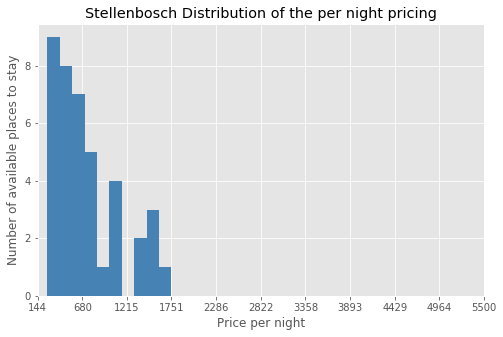

In [135]:
area = 'Stellenbosch'
#count,bin_edges = np.histogram(df_places_stay_2.loc[df_places_stay_2.Grouping== area]['Price'])
df_places_stay_2.loc[df_places_stay_2.Grouping==area]['Price'].plot(kind='hist',figsize=(8,5),xticks = bin_edges,color='steelblue')
plt.title(area+' Distribution of the per night pricing')
plt.ylabel('Number of available places to stay')
plt.xlabel('Price per night')

plt.show()

In [195]:
#Swarmplot
area = 'Stellenbosch'
plt.figure(figsize=(4,6))
sns.set(font_scale=1.1)
sns.swarmplot(data=df_places_stay_2.loc[df_places_stay_2.Grouping==area],x='Grouping',y='Price',hue='Neighborhood',dodge=True)

plt.title(area+' per night pricing distribution')
#plt.title('Histogram of the Distribution of the per night pricing')
plt.ylabel('Price per night')

plt.show()

In [136]:
df_places_stay_2.loc[df_places_stay_2.Grouping== area].describe()

Price
count    40.000000
mean    757.225000
std     410.086638
min     261.000000
25%     450.000000
50%     665.000000
75%    1004.750000
max    1750.000000

#### Producing a view for Strand Grouping

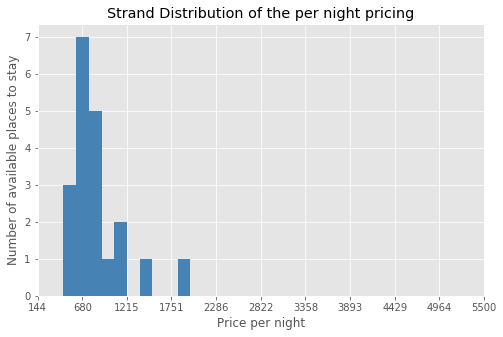

In [137]:
area = 'Strand'
#count,bin_edges = np.histogram(df_places_stay_2.loc[df_places_stay_2.Grouping== area]['Price'])
df_places_stay_2.loc[df_places_stay_2.Grouping==area]['Price'].plot(kind='hist',figsize=(8,5),xticks = bin_edges,color='steelblue')
plt.title(area+' Distribution of the per night pricing')
plt.ylabel('Number of available places to stay')
plt.xlabel('Price per night')

plt.show()

In [196]:
#Swarmplot
area = 'Strand'
plt.figure(figsize=(4,6))
sns.set(font_scale=1.1)
sns.swarmplot(data=df_places_stay_2.loc[df_places_stay_2.Grouping==area],x='Grouping',y='Price',hue='Neighborhood',dodge=True)

plt.title(area+' per night pricing distribution')
#plt.title('Histogram of the Distribution of the per night pricing')
plt.ylabel('Price per night')

plt.show()

In [138]:
df_places_stay_2.loc[df_places_stay_2.Grouping== area].describe()

Price
count    20.000000
mean    868.550000
std     341.539622
min     454.000000
25%     707.750000
50%     786.500000
75%     920.750000
max    1978.000000

#### Producing a view for Swartland Grouping

In [139]:
area = 'Swartland'
#count,bin_edges = np.histogram(df_places_stay_2.loc[df_places_stay_2.Grouping== area]['Price'])
df_places_stay_2.loc[df_places_stay_2.Grouping==area]['Price'].plot(kind='hist',figsize=(8,5),xticks = bin_edges,color='steelblue')
plt.title(area+' Distribution of the per night pricing')
plt.ylabel('Number of available places to stay')
plt.xlabel('Price per night')

plt.show()

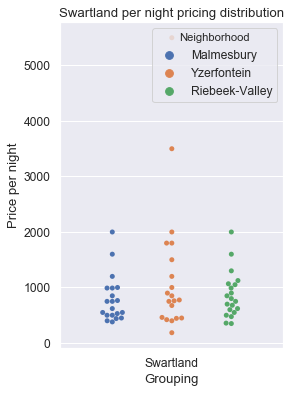

In [198]:
#Swarmplot
area = 'Swartland'
plt.figure(figsize=(4,6))
sns.set(font_scale=1.1)
sns.swarmplot(data=df_places_stay_2.loc[df_places_stay_2.Grouping==area],x='Grouping',y='Price',hue='Neighborhood',dodge=True)

plt.title(area+' per night pricing distribution')
#plt.title('Histogram of the Distribution of the per night pricing')
plt.ylabel('Price per night')

plt.show()

In [140]:
df_places_stay_2.loc[df_places_stay_2.Grouping== area].describe()

Price
count    60.000000
mean    974.150000
std     818.253283
min     185.000000
25%     500.000000
50%     755.000000
75%    1054.250000
max    5500.000000

#### Producing a view for Theewaterskloof Grouping

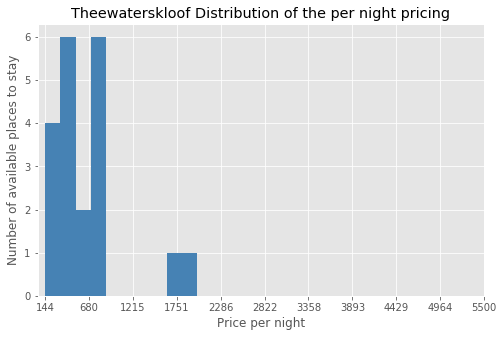

In [141]:
area = 'Theewaterskloof'
#count,bin_edges = np.histogram(df_places_stay_2.loc[df_places_stay_2.Grouping== area]['Price'])
df_places_stay_2.loc[df_places_stay_2.Grouping==area]['Price'].plot(kind='hist',figsize=(8,5),xticks = bin_edges,color='steelblue')
plt.title(area+' Distribution of the per night pricing')
plt.ylabel('Number of available places to stay')
plt.xlabel('Price per night')

plt.show()

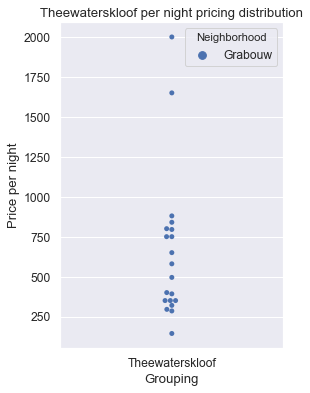

In [199]:
#Swarmplot
area = 'Theewaterskloof'
plt.figure(figsize=(4,6))
sns.set(font_scale=1.1)
sns.swarmplot(data=df_places_stay_2.loc[df_places_stay_2.Grouping==area],x='Grouping',y='Price',hue='Neighborhood',dodge=True)

plt.title(area+' per night pricing distribution')
#plt.title('Histogram of the Distribution of the per night pricing')
plt.ylabel('Price per night')

plt.show()

In [142]:
df_places_stay_2.loc[df_places_stay_2.Grouping== area].describe()

Price
count    20.000000
mean    653.800000
std     460.372344
min     144.000000
25%     350.000000
50%     537.500000
75%     796.250000
max    2000.000000

### Obtaining Four Square details

Now that the Neighbourhood details are in place the next step is by utilising the four square API to retreive the top 100 venues in each of the respective neighborhoods

#### Defining Four Square Credentials

### Creating a function to obtain the top 100 venues for every neighborhood in the Western Cape
Due to venues being quite spread out the radius was expanded to 20km 

In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=20000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Applying the above function to the neighborhood data set

In [45]:
LIMIT = 100
WesternCape_venues = getNearbyVenues(names=neighborhoods_revised_final['Neighborhood'],
                                   latitudes=neighborhoods_revised_final['Latitude'],
                                   longitudes=neighborhoods_revised_final['Longitude']
                                  )

Ceres
Gansbaai
Kleinmond
Langebaan
Malmesbury
Paternoster
Riebeek Valley
Saldanha
Somerset West
Stellenbosch
Strand
Vredenburg
Wellington
Worcester
Bettys Bay
Grabouw
Paarl
Robertson
Velddrif
Yzerfontein
Franschhoek
Cape Town


#### Checking the size of the resulting DataFrame

In [46]:
print(WesternCape_venues.shape)
WesternCape_venues.head()

(231, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Ceres             -33.368333               19.309167   
1        Ceres             -33.368333               19.309167   
2        Ceres             -33.368333               19.309167   
3        Ceres             -33.368333               19.309167   
4        Ceres             -33.368333               19.309167   

              Venue  Venue Latitude  Venue Longitude        Venue Category  
0             Wimpy      -33.366085        19.316542          Burger Joint  
1        Spar Ceres      -33.372555        19.307444     Convenience Store  
2  Rocky River Spur      -33.366721        19.316228        Breakfast Spot  
3            Steers      -33.372059        19.305644  Fast Food Restaurant  
4  Pick N Pay Ceres      -33.365802        19.316216         Grocery Store

Checking how many venues were returned for each neighborhood

In [58]:
WesternCape_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                           
Bettys Bay                          8                       8      8   
Cape Town                           5                       5      5   
Ceres                               5                       5      5   
Franschhoek                        36                      36     36   
Gansbaai                            8                       8      8   
Grabouw                             7                       7      7   
Kleinmond                           4                       4      4   
Langebaan                          11                      11     11   
Malmesbury                          6                       6      6   
Paarl                               3                       3      3   
Paternoster                        14                      14     14   
Riebeek Valley                      4                       4      4   
Robertson                          11                      11     11   
Saldanha                            6                       6      6   
Somerset West                      25                      25     25   
Stellenbosch                       50                      50     50   
Velddrif                            2                       2      2   
Vredenburg                          6                       6      6   
Wellington                          7                       7      7   
Worcester                           9                       9      9   
Yzerfontein                         4                       4      4   

                Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                     
Bettys Bay                   8                8               8  
Cape Town                    5                5               5  
Ceres                        5                5               5  
Franschhoek                 36               36              36  
Gansbaai                     8                8               8  
Grabouw                      7                7               7  
Kleinmond                    4                4               4  
Langebaan                   11               11              11  
Malmesbury                   6                6               6  
Paarl                        3                3               3  
Paternoster                 14               14              14  
Riebeek Valley               4                4               4  
Robertson                   11               11              11  
Saldanha                     6                6               6  
Somerset West               25               25              25  
Stellenbosch                50               50              50  
Velddrif                     2                2               2  
Vredenburg                   6                6               6  
Wellington                   7                7               7  
Worcester                    9                9               9  
Yzerfontein                  4                4               4

#### Finding out how many unique categories can be curated from all the returned venues

In [59]:
print('There are {} unique categories'.format(len(WesternCape_venues['Venue Category'].unique())))

There are 81 unique categories


# CheckPoint_2
Creating a check point on where to pick up from

In [47]:
# saving the output to a csv format
WesternCape_venues.to_csv('Western_Cape_venues.csv',index=False)

In [12]:
# reading the data from the csv
WesternCape_venues = pd.read_csv('Western_Cape_venues.csv')

In [25]:
WesternCape_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0             Ceres             -33.368333               19.309167   
1             Ceres             -33.368333               19.309167   
2             Ceres             -33.368333               19.309167   
3             Ceres             -33.368333               19.309167   
4             Ceres             -33.368333               19.309167   
5          Gansbaai             -34.582778               19.352222   
6          Gansbaai             -34.582778               19.352222   
7          Gansbaai             -34.582778               19.352222   
8          Gansbaai             -34.582778               19.352222   
9          Gansbaai             -34.582778               19.352222   
10         Gansbaai             -34.582778               19.352222   
11         Gansbaai             -34.582778               19.352222   
12         Gansbaai             -34.582778               19.352222   
13        Kleinmond             -34.338889               19.025278   
14        Kleinmond             -34.338889               19.025278   
15        Kleinmond             -34.338889               19.025278   
16        Kleinmond             -34.338889               19.025278   
17        Langebaan             -33.090717               18.034889   
18        Langebaan             -33.090717               18.034889   
19        Langebaan             -33.090717               18.034889   
20        Langebaan             -33.090717               18.034889   
21        Langebaan             -33.090717               18.034889   
22        Langebaan             -33.090717               18.034889   
23        Langebaan             -33.090717               18.034889   
24        Langebaan             -33.090717               18.034889   
25        Langebaan             -33.090717               18.034889   
26        Langebaan             -33.090717               18.034889   
27        Langebaan             -33.090717               18.034889   
28       Malmesbury             -33.460278               18.723611   
29       Malmesbury             -33.460278               18.723611   
30       Malmesbury             -33.460278               18.723611   
31       Malmesbury             -33.460278               18.723611   
32       Malmesbury             -33.460278               18.723611   
33       Malmesbury             -33.460278               18.723611   
34      Paternoster             -32.809038               17.891695   
35      Paternoster             -32.809038               17.891695   
36      Paternoster             -32.809038               17.891695   
37      Paternoster             -32.809038               17.891695   
38      Paternoster             -32.809038               17.891695   
39      Paternoster             -32.809038               17.891695   
40      Paternoster             -32.809038               17.891695   
41      Paternoster             -32.809038               17.891695   
42      Paternoster             -32.809038               17.891695   
43      Paternoster             -32.809038               17.891695   
44      Paternoster             -32.809038               17.891695   
45      Paternoster             -32.809038               17.891695   
46      Paternoster             -32.809038               17.891695   
47      Paternoster             -32.809038               17.891695   
48   Riebeek Valley             -33.351008               18.870026   
49   Riebeek Valley             -33.351008               18.870026   
50   Riebeek Valley             -33.351008               18.870026   
51   Riebeek Valley             -33.351008               18.870026   
52         Saldanha             -32.997778               17.945556   
53         Saldanha             -32.997778               17.945556   
54         Saldanha             -32.997778               17.945556   
55         Saldanha             -32.997778               17.945556   
56         Saldan

.

## 3. Analyze Each Neighborhood

In [13]:
# one hot encoding
WesternCape_onehot = pd.get_dummies(WesternCape_venues[['Venue Category']],prefix='',prefix_sep='')

# add neighborhood column back to dataframe
WesternCape_onehot['Neighborhood'] = WesternCape_venues[['Neighborhood']]

# move neighborhood column to the first column
fixed_columns = [WesternCape_onehot.columns[-1]] + list(WesternCape_onehot.columns[:-1])
WesternCape_onehot = WesternCape_onehot[fixed_columns]

WesternCape_onehot.head()

Winery  African Restaurant  Athletics & Sports  Auto Workshop  Bakery  Bar  \
0       0                   0                   0              0       0    0   
1       0                   0                   0              0       0    0   
2       0                   0                   0              0       0    0   
3       0                   0                   0              0       0    0   
4       0                   0                   0              0       0    0   

   Beach  Bed & Breakfast  Bistro  Botanical Garden  Breakfast Spot  Brewery  \
0      0                0       0                 0               0        0   
1      0                0       0                 0               0        0   
2      0                0       0                 0               1        0   
3      0                0       0                 0               0        0   
4      0                0       0                 0               0        0   

   Burger Joint  Cable Car  Café  Campground  Chocolate Shop  Coffee Shop  \
0             1          0     0           0               0            0   
1             0          0     0           0               0            0   
2             0          0     0           0               0            0   
3             0          0     0           0               0            0   
4             0          0     0           0               0            0   

   Concert Hall  Construction & Landscaping  Convenience Store  Deli / Bodega  \
0             0                           0                  0              0   
1             0                           0                  1              0   
2             0                           0                  0              0   
3             0                           0                  0              0   
4             0                           0                  0              0   

   Department Store  Diner  Discount Store  Fast Food Restaurant  \
0                 0      0               0                     0   
1                 0      0               0                     0   
2                 0      0               0                     0   
3                 0      0               0                     1   
4                 0      0               0                     0   

   Fish & Chips Shop  Flea Market  Food  Food & Drink Shop  Football Stadium  \
0                  0            0     0                  0                 0   
1                  0            0     0                  0                 0   
2                  0            0     0                  0                 0   
3                  0            0     0                  0                 0   
4                  0            0     0                  0                 0   

   French Restaurant  Fried Chicken Joint  Gas Station  Gastropub  Gift Shop  \
0                  0                    0            0          0          0   
1                  0                    0            0          0          0   
2                  0                    0            0          0          0   
3                  0                    0            0          0          0   
4                  0                    0            0          0          0   

   Golf Course  Greek Restaurant  Grocery Store  Gym  Harbor / Marina  \
0            0                 0              0    0                0   
1            0                 0              0    0                0   
2            0                 0              0    0                0   
3            0                 0              0    0                0   
4            0                 0              1    0                0   

   History Museum  Hostel  Hotel  Indian Restaurant  Inn  Italian Restaurant  \
0               0       0      0                  0    0                   0   
1               0       0      0                  0    0                   0   
2               0       0      0   

Examining the size of the dataframe

In [14]:
WesternCape_onehot.shape

(231, 81)

#### Grouping rows by Neighborhood and obtaining the mean of the frequency of occurrence of each category

In [15]:
WesternCape_grouped = WesternCape_onehot.groupby('Neighborhood').mean().reset_index()
WesternCape_grouped

Neighborhood  Winery  African Restaurant  Athletics & Sports  \
0       Bettys Bay    0.00            0.000000            0.000000   
1        Cape Town    0.00            0.000000            0.000000   
2            Ceres    0.00            0.000000            0.000000   
3      Franschhoek    0.00            0.055556            0.000000   
4         Gansbaai    0.00            0.000000            0.000000   
5          Grabouw    0.00            0.000000            0.000000   
6        Kleinmond    0.00            0.000000            0.000000   
7        Langebaan    0.00            0.000000            0.000000   
8       Malmesbury    0.00            0.000000            0.000000   
9            Paarl    0.00            0.000000            0.000000   
10     Paternoster    0.00            0.000000            0.000000   
11  Riebeek Valley    0.00            0.000000            0.000000   
12       Robertson    0.00            0.000000            0.000000   
13        Saldanha    0.00            0.000000            0.166667   
14   Somerset West    0.00            0.000000            0.000000   
15    Stellenbosch    0.02            0.000000            0.020000   
16        Velddrif    0.00            0.000000            0.000000   
17      Vredenburg    0.00            0.000000            0.000000   
18      Wellington    0.00            0.000000            0.000000   
19       Worcester    0.00            0.000000            0.000000   
20     Yzerfontein    0.00            0.000000            0.000000   

    Auto Workshop    Bakery       Bar     Beach  Bed & Breakfast  Bistro  \
0        0.000000  0.000000  0.000000  0.000000         0.000000    0.00   
1        0.000000  0.000000  0.000000  0.000000         0.000000    0.00   
2        0.000000  0.000000  0.000000  0.000000         0.000000    0.00   
3        0.000000  0.027778  0.000000  0.000000         0.000000    0.00   
4        0.000000  0.000000  0.000000  0.000000         0.125000    0.00   
5        0.000000  0.000000  0.000000  0.000000         0.000000    0.00   
6        0.000000  0.000000  0.000000  0.250000         0.000000    0.00   
7        0.090909  0.000000  0.000000  0.181818         0.000000    0.00   
8        0.000000  0.000000  0.000000  0.000000         0.000000    0.00   
9        0.000000  0.000000  0.000000  0.000000         0.000000    0.00   
10       0.000000  0.000000  0.071429  0.071429         0.000000    0.00   
11       0.000000  0.000000  0.000000  0.000000         0.000000    0.00   
12       0.000000  0.000000  0.000000  0.000000         0.090909    0.00   
13       0.000000  0.000000  0.000000  0.000000         0.000000    0.00   
14       0.000000  0.040000  0.040000  0.000000         0.000000    0.00   
15       0.000000  0.000000  0.060000  0.000000         0.020000    0.02   
16       0.000000  0.000000  0.000000  0.000000         0.000000    0.00   
17       0.000000  0.000000  0.000000  0.000000         0.000000    0.00   
18       0.000000  0.000000  0.000000  0.000000         0.000000    0.00   
19       0.000000  0.000000  0.000000  0.000000         0.000000    0.00   
20       0.000000  0.000000  0.000000  0.500000         0.000000    0.00   

    Botanical Garden  Breakfast Spot   Brewery  Burger Joint  Cable Car  \
0               0.00        0.000000  0.000000      0.000000        0.0   
1               0.00        0.000000  0.000000      0.000000        0.2   
2               0.00        0.200000  0.000000      0.200000        0.0   
3               0.00        0.027778  0.055556      0.027778        0.0   
4               0.00        0.000000  0.000000      0.125000        0.0   
5               0.00        0.000000  0.000000      0.000000        0.0   
6               0.00        0.000000  0.000000      0.000000        0.0   
7               0.00        0.000000  0.000000      0.000000        0.0   
8               0.00        0.166667  0.000000      0.166667        0.0   
9               0.00        0.000000  0.00

Confirming the new size of the dataFrame

In [16]:
WesternCape_grouped.shape

(21, 81)

#### Capturing all the data into a Dataframe

Function to sort the venues into descending order

In [17]:
def return_most_common_venues(row,num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

The below piece of code provides the 10 most common venues across each of the neighborhoods

In [26]:
num_top_venues = 10

indicators = ['st','nd','rd']

columns =['Neighborhood']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format (ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# crearting a new DataFrame
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = WesternCape_grouped['Neighborhood']
neighborhoods_venues_sorted

for ind in np.arange(WesternCape_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(WesternCape_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted.head(10)    

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0   Bettys Bay           Coffee Shop                   Inn   
1    Cape Town        Scenic Lookout             Gift Shop   
2        Ceres         Grocery Store        Breakfast Spot   
3  Franschhoek                 Hotel     French Restaurant   
4     Gansbaai    Seafood Restaurant          Burger Joint   
5      Grabouw         Grocery Store     Convenience Store   
6    Kleinmond          Liquor Store           Gas Station   
7    Langebaan                 Beach           Coffee Shop   
8   Malmesbury         Grocery Store        Breakfast Spot   
9        Paarl            Restaurant           Gas Station   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0            Campground            Restaurant                 River   
1                  Café             Cable Car             Wine Shop   
2  Fast Food Restaurant          Burger Joint     Convenience Store   
3           Coffee Shop            Restaurant               Brewery   
4       Harbor / Marina            Restaurant       Bed & Breakfast   
5      Department Store   Fried Chicken Joint        Discount Store   
6                 Beach         Grocery Store             Gastropub   
7             Gastropub         Auto Workshop                   Pub   
8          Burger Joint  Fast Food Restaurant           Pizza Place   
9             Wine Shop           Flea Market         Deli / Bodega   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Scenic Lookout                  Park                Hostel   
1           Flea Market      Department Store                 Diner   
2      Department Store                 Diner        Discount Store   
3    African Restaurant          Burger Joint    Italian Restaurant   
4     Convenience Store         Shopping Mall             Wine Shop   
5         Shopping Mall           Flea Market         Deli / Bodega   
6           Flea Market         Deli / Bodega      Department Store   
7                 Hotel            Restaurant     Convenience Store   
8           Gas Station     Fish & Chips Shop           Golf Course   
9      Department Store                 Diner        Discount Store   

      9th Most Common Venue 10th Most Common Venue  
0          Football Stadium      French Restaurant  
1            Discount Store   Fast Food Restaurant  
2         Fish & Chips Shop            Flea Market  
3  Mediterranean Restaurant         Chocolate Shop  
4          Department Store                  Diner  
5                     Diner   Fast Food Restaurant  
6                     Diner         Discount Store  
7      Fast Food Restaurant     Seafood Restaurant  
8             Deli / Bodega       Department Store  
9      Fast Food Restaurant      Fish & Chips Shop

# Check Point

In [28]:
# creating a check point on where to pick up from
neighborhoods_venues_sorted.to_csv('neighborhoods_venues_sorted.csv',index=False)
neighborhoods_venues_sorted = pd.read_csv('neighborhoods_venues_sorted.csv')

## 4. Cluster Neighborhoods

To understand the different activities better accross the different neighborhoods, I have utilised the unsupervised learning K-means algorithm  to cluster the neighborhoods by the activities that can be performed in each one. A decision was used to cluster them into 5 clusters

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# set number of clusters
kclusters = 5

WesternCape_grouped_clustering = WesternCape_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(WesternCape_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 3, 2, 0, 3, 3, 2, 3, 1])

Adding the cluster to classification to the dataframe that contains the top 10 venues

In [31]:
neighborhoods_venues_sorted.insert(0,'Cluster_Labels',kmeans.labels_)

In [81]:
neighborhoods_final = neighborhoods_revised_final[['Neighborhood','Latitude','Longitude']]

In [86]:
#Updating the name so that they align with the other data set
neighborhoods_final.loc[6,['Neighborhood']] = 'Riebeek Valley'
neighborhoods_final.loc[13,['Neighborhood']] = 'Bettys Bay'
neighborhoods_final.loc[20,['Neighborhood']] = 'Somerset West'
neighborhoods_final.loc[21,['Neighborhood']] = 'Cape Town'

Adding the cluster classification as well as the most common venues to the Neighbourhood data set

In [88]:
WesternCape_merged = neighborhoods_final
WesternCape_merged = WesternCape_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
WesternCape_merged.head()

Neighborhood   Latitude  Longitude  Cluster_Labels 1st Most Common Venue  \
0        Ceres -33.368333  19.309167             3.0         Grocery Store   
1     Gansbaai -34.582778  19.352222             0.0    Seafood Restaurant   
2    Kleinmond -34.338889  19.025278             3.0          Liquor Store   
3    Langebaan -33.090717  18.034889             2.0                 Beach   
4   Malmesbury -33.460278  18.723611             3.0         Grocery Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0        Breakfast Spot  Fast Food Restaurant          Burger Joint   
1          Burger Joint       Harbor / Marina            Restaurant   
2           Gas Station                 Beach         Grocery Store   
3           Coffee Shop             Gastropub         Auto Workshop   
4        Breakfast Spot          Burger Joint  Fast Food Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0     Convenience Store      Department Store                 Diner   
1       Bed & Breakfast     Convenience Store         Shopping Mall   
2             Gastropub           Flea Market         Deli / Bodega   
3                   Pub                 Hotel            Restaurant   
4           Pizza Place           Gas Station     Fish & Chips Shop   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0        Discount Store     Fish & Chips Shop            Flea Market  
1             Wine Shop      Department Store                  Diner  
2      Department Store                 Diner         Discount Store  
3     Convenience Store  Fast Food Restaurant     Seafood Restaurant  
4           Golf Course         Deli / Bodega       Department Store

In [89]:
# where dropping all Nan values where no classications could be obtained due to no Foursquare readings
lst_indx_drop = list(WesternCape_merged.loc[WesternCape_merged.Cluster_Labels.isna()].index)
WesternCape_merged.drop(axis = 0,index = lst_indx_drop,inplace = True)
WesternCape_merged.reset_index(drop=True,inplace=True)

# Changing cluster labels to integers
WesternCape_merged.Cluster_Labels = WesternCape_merged.Cluster_Labels.astype(int)

Visualising the resulting clusters

In [90]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(WesternCape_merged['Latitude'], WesternCape_merged['Longitude'], WesternCape_merged['Neighborhood'], WesternCape_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 5. Examine the Clusters

Examining each cluster to determine the descriminating venue categories that distinguish each cluster to assign a name to each cluster

In [62]:
headings=[]
headings.append(WesternCape_merged.columns[0])
headings = headings + list(WesternCape_merged.columns[3:])

#### Cluster 1

In [91]:
WesternCape_merged.loc[WesternCape_merged['Cluster_Labels'] == 0,headings]

Neighborhood  Cluster_Labels 1st Most Common Venue 2nd Most Common Venue  \
1     Gansbaai               0    Seafood Restaurant          Burger Joint   
5  Paternoster               0    Seafood Restaurant            Restaurant   
7     Saldanha               0     Convenience Store       Harbor / Marina   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1       Harbor / Marina            Restaurant       Bed & Breakfast   
5                 Hotel           Pizza Place                   Bar   
7    Travel & Transport    Athletics & Sports    Seafood Restaurant   

        6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1           Convenience Store         Shopping Mall             Wine Shop   
5                       Beach     Food & Drink Shop   Fried Chicken Joint   
7  Construction & Landscaping           Flea Market         Deli / Bodega   

  9th Most Common Venue 10th Most Common Venue  
1      Department Store                  Diner  
5           Gas Station      French Restaurant  
7      Department Store                  Diner

From the clustering performed this classification would seem to be one for seafood restuarants

#### Cluster 2

In [92]:
WesternCape_merged.loc[WesternCape_merged['Cluster_Labels'] == 1,headings]

Neighborhood  Cluster_Labels 1st Most Common Venue 2nd Most Common Venue  \
14        Paarl               1            Restaurant           Gas Station   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
14             Wine Shop           Flea Market         Deli / Bodega   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
14      Department Store                 Diner        Discount Store   

   9th Most Common Venue 10th Most Common Venue  
14  Fast Food Restaurant      Fish & Chips Shop

Cluster one can be classified as general resturants

#### Cluster 3

In [93]:
WesternCape_merged.loc[WesternCape_merged['Cluster_Labels'] == 2,headings]

Neighborhood  Cluster_Labels 1st Most Common Venue  \
3        Langebaan               2                 Beach   
6   Riebeek Valley               2             Wine Shop   
8     Stellenbosch               2           Coffee Shop   
9       Vredenburg               2            Restaurant   
10      Wellington               2  Fast Food Restaurant   
11       Worcester               2  Fast Food Restaurant   
12      Bettys Bay               2           Coffee Shop   
15       Robertson               2           Supermarket   
17     Yzerfontein               2                 Beach   
18     Franschhoek               2                 Hotel   
19   Somerset West               2            Restaurant   
20       Cape Town               2        Scenic Lookout   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
3            Coffee Shop             Gastropub         Auto Workshop   
6                  Diner                 Hotel         Shopping Mall   
8                  Hotel                   Bar            Restaurant   
9              Locksmith     Other Repair Shop      Department Store   
10     Food & Drink Shop           Gas Station                  Café   
11           Pizza Place            Steakhouse           Gas Station   
12                   Inn            Campground            Restaurant   
15        Breakfast Spot          Burger Joint              Pharmacy   
17         Deli / Bodega            Restaurant             Wine Shop   
18     French Restaurant           Coffee Shop            Restaurant   
19                  Café           Coffee Shop           Golf Course   
20             Gift Shop                  Café             Cable Car   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
3                    Pub                 Hotel            Restaurant   
6                   Food         Deli / Bodega      Department Store   
8       Sushi Restaurant                   Gym                  Café   
9   Fast Food Restaurant             Wine Shop         Deli / Bodega   
10          Burger Joint     Convenience Store           Flea Market   
11                 Hotel            Restaurant                  Café   
12                 River        Scenic Lookout                  Park   
15           Gas Station                 Hotel           Coffee Shop   
17                  Food      Department Store                 Diner   
18               Brewery    African Restaurant          Burger Joint   
19         Grocery Store  Fast Food Restaurant     Indian Restaurant   
20             Wine Shop           Flea Market      Department Store   

   8th Most Common Venue     9th Most Common Venue 10th Most Common Venue  
3      Convenience Store      Fast Food Restaurant     Seafood Restaurant  
6         Discount Store      Fast Food Restaurant      Fish & Chips Shop  
8             Steakhouse                      Food              Juice Bar  
9                  Diner            Discount Store      Fish & Chips Shop  
10      Department Store                     Diner         Discount Store  
11         Grocery Store           Bed & Breakfast      Food & Drink Shop  
12                Hostel          Football Stadium      French Restaurant  
15       Bed & Breakfast      Fast Food Restaurant                   Café  
17        Discount Store      Fast Food Restaurant      Fish & Chips Shop  
18    Italian Restaurant  Mediterranean Restaurant         Chocolate Shop  
19    Italian Restaurant         Mobile Phone Shop              Nightclub  
20                 Diner            Discount Store   Fast Food Restaurant

Cluster 3 does not seem to have any form of unifying them to it so it will be classfied as general

#### Cluster 4

In [94]:
WesternCape_merged.loc[WesternCape_merged['Cluster_Labels'] == 3, headings]

Neighborhood  Cluster_Labels 1st Most Common Venue 2nd Most Common Venue  \
0         Ceres               3         Grocery Store        Breakfast Spot   
2     Kleinmond               3          Liquor Store           Gas Station   
4    Malmesbury               3         Grocery Store        Breakfast Spot   
13      Grabouw               3         Grocery Store     Convenience Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0   Fast Food Restaurant          Burger Joint     Convenience Store   
2                  Beach         Grocery Store             Gastropub   
4           Burger Joint  Fast Food Restaurant           Pizza Place   
13      Department Store   Fried Chicken Joint        Discount Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0       Department Store                 Diner        Discount Store   
2            Flea Market         Deli / Bodega      Department Store   
4            Gas Station     Fish & Chips Shop           Golf Course   
13         Shopping Mall           Flea Market         Deli / Bodega   

   9th Most Common Venue 10th Most Common Venue  
0      Fish & Chips Shop            Flea Market  
2                  Diner         Discount Store  
4          Deli / Bodega       Department Store  
13                 Diner   Fast Food Restaurant

Cluster 4 looks like is is generarl retail items

#### Cluster 5

In [95]:
WesternCape_merged.loc[WesternCape_merged['Cluster_Labels'] == 4, headings]

Neighborhood  Cluster_Labels 1st Most Common Venue 2nd Most Common Venue  \
16     Velddrif               4           Coffee Shop     Fish & Chips Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
16             Wine Shop     Convenience Store      Department Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
16                 Diner        Discount Store  Fast Food Restaurant   

   9th Most Common Venue 10th Most Common Venue  
16           Flea Market                   Food

Cluster 5 will be classified as coffee Shops

The below overlays the two groups of research that were performed the rental prices from Air Bnb as well as activities by grouping that comes from Four Square. 

In [96]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

map_clusters.choropleth(
    geo_data=path_geo,
    data=df_avg_pricing,
    columns=['Grouping', 'Price'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Nightly Rate'
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(WesternCape_merged['Latitude'], WesternCape_merged['Longitude'], WesternCape_merged['Neighborhood'], WesternCape_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Additional research Required
1) The WesternCape is known as the wine Regeon with in South Africa and there seems to be a distinct lack of these coming through on the four square data, additional websited will need to be scraped to obtain this information  
2) additional activities will need to be added from a site like Trip advisor as there seems to be lack of this coming from four sqaure